In [1]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# list of ages to drive the loop
ages = [0.5, 1, 1.5, 2, 2.5, 3, 4]
n = len(ages)

In [3]:
def compute_yse(age,flags):
    outfile = open('out.temp','w')
    runcmd = 'ocean_litho_yse' + ' ' + str(age) + ' '
    for flag, val in flags.items():
        runcmd = runcmd + str(flag) + ' ' + str(val) + ' '
    print(runcmd)
    call(runcmd,shell=True,stdout=outfile)

In [4]:
def read_yse_data(yse_file):
    data = np.loadtxt(yse_file)
    z = -1*data[:,0]
    temp = data[:,1]
    pressure = data[:,2]
    strength_tension = data[:,3]
    strength_compress = data[:,4]
    return z,temp,pressure,strength_tension,strength_compress

In [5]:
def plot_YSE(ax,ysc,yst,z):
    ax.plot(ysc,z)
    ax.plot(yst,z)
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-20, 0)

ocean_litho_yse 0.5 tesw 1 hssw 0 
ocean_litho_yse 1 tesw 1 hssw 0 
ocean_litho_yse 1.5 tesw 1 hssw 0 
ocean_litho_yse 2 tesw 1 hssw 0 
ocean_litho_yse 2.5 tesw 1 hssw 0 
ocean_litho_yse 3 tesw 1 hssw 0 
ocean_litho_yse 4 tesw 1 hssw 0 


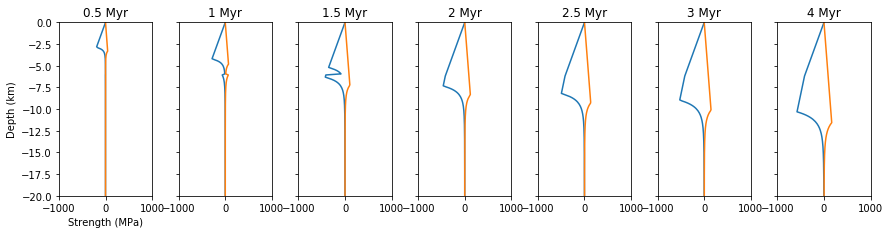

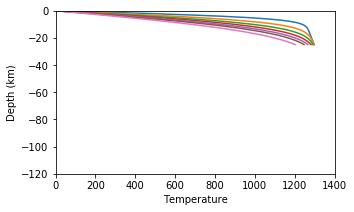

In [6]:
i = 0
# prepare plotting axes
fig_ystr, axes = plt.subplots(nrows=1,ncols=n,sharey='all',sharex='all',figsize=(12.0, 3.0))
fig_ystr.tight_layout()
fig_temp, ax_t = plt.subplots(figsize=(5.0, 3.0))
# initialize integrated strength array
strength_a = np.zeros((n,1))
# define flags for YSE model
mod_flags = {
    'tesw': 1,
    'hssw': 0
}

for age in ages:
    compute_yse(age,mod_flags)
    z,temp_a,pressure,ystr_tension_a,ystr_compress_a = read_yse_data('out.temp')
    #--------------------------------------
    # plot yse
    plot_YSE(axes[i],ystr_compress_a,ystr_tension_a,z)
    axes[i].set_title(str(age) + " Myr")
    
    if i == 0:
        axes[i].set_xlabel('Strength (MPa)')
        axes[i].set_ylabel('Depth (km)')
        
    #--------------------------------------
    # plot temperature
    ax_t.plot(temp_a,z,label=age)
    if i == (n-1):
        plt.xlim(0,1400)
        plt.ylim(-120,0)
        plt.xlabel('Temperature')
        plt.ylabel('Depth (km)')
    #--------------------------------------
    # integrated strength
    strength_a[i] = np.trapz((ystr_tension_a - ystr_compress_a)*1e6,-1*z*1e3);
    
    i+=1
    

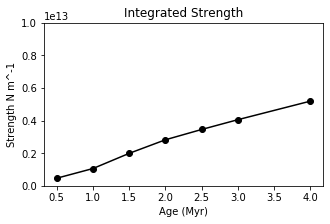

In [9]:
fig_str, ax_str = plt.subplots(figsize=(5.0, 3.0))
ax_str.plot(ages,strength_a,'ko-')
ax_str.set_ylim(0, 1e13);
ax_str.set_xlabel('Age (Myr)');
ax_str.set_ylabel('Strength N m^-1');
ax_str.set_title('Integrated Strength')
plt.show()

ocean_litho_yse 0.5 tesw 1 hssw 1 
ocean_litho_yse 1 tesw 1 hssw 1 
ocean_litho_yse 1.5 tesw 1 hssw 1 
ocean_litho_yse 2 tesw 1 hssw 1 
ocean_litho_yse 2.5 tesw 1 hssw 1 
ocean_litho_yse 3 tesw 1 hssw 1 
ocean_litho_yse 4 tesw 1 hssw 1 


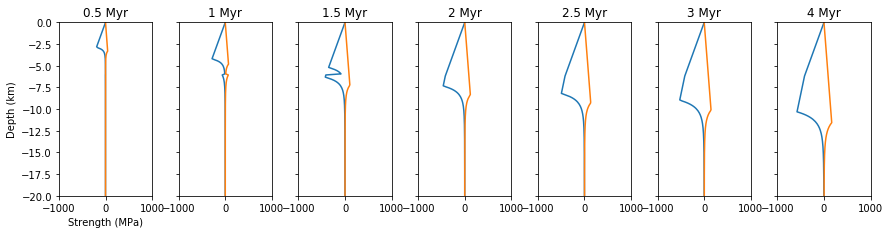

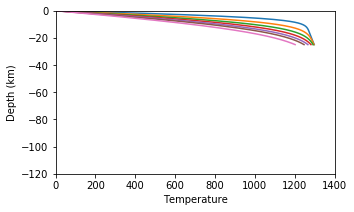

In [15]:
i = 0
# prepare plotting axes
fig_ystr, axes = plt.subplots(nrows=1,ncols=n,sharey='all',sharex='all',figsize=(12.0, 3.0))
fig_ystr.tight_layout()
fig_temp, ax_t = plt.subplots(figsize=(5.0, 3.0))
# initialize integrated strength array
strength_b = np.zeros((n,1))
# define flags for YSE model
mod_flags = {
    'tesw': 1,
    'hssw': 1
}

for age in ages:
    compute_yse(age,mod_flags)
    z,temp_b,pressure,ystr_tension_b,ystr_compress_b = read_yse_data('out.temp')
    #--------------------------------------
    # plot yse
    plot_YSE(axes[i],ystr_compress_b,ystr_tension_b,z)
    axes[i].set_title(str(age) + " Myr")
    
    if i == 0:
        axes[i].set_xlabel('Strength (MPa)')
        axes[i].set_ylabel('Depth (km)')
        
    #--------------------------------------
    # plot temperature
    ax_t.plot(temp_b,z,label=age)
    if i == (n-1):
        plt.xlim(0,1400)
        plt.ylim(-120,0)
        plt.xlabel('Temperature')
        plt.ylabel('Depth (km)')
    #--------------------------------------
    # integrated strength
    strength_b[i] = np.trapz((ystr_tension_b - ystr_compress_b)*1e6,-1*z*1e3);
    
    i+=1

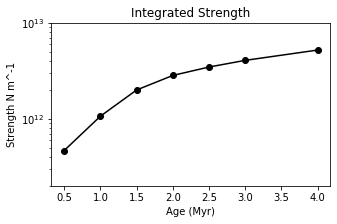

In [10]:
fig_str, ax_str = plt.subplots(figsize=(5.0, 3.0))
ax_str.semilogy(ages,strength_b,'ko-')
ax_str.set_ylim(0.2e12, 1e13);
ax_str.set_xlabel('Age (Myr)');
ax_str.set_ylabel('Strength N m^-1');
ax_str.set_title('Integrated Strength')
plt.show()

In [11]:
ystr_compress_diff = ystr_compress_a - ystr_compress_b
for age in ages:
    
    print(np.sum(ystr_compress_diff))
    print(np.sum(temp_a - temp_b))

0.0
0.008256000000000263
